In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
df = pd.read_csv("./data/creditcard_2023.csv").drop(columns = "id")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Selecting features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Training the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

KeyboardInterrupt: 

In [6]:
# Getting feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame and sort them
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

   Feature  Importance
0       V1         0.0
15     V16         0.0
27     V28         0.0
26     V27         0.0
25     V26         0.0
24     V25         0.0
23     V24         0.0
22     V23         0.0
21     V22         0.0
20     V21         0.0
19     V20         0.0
18     V19         0.0
17     V18         0.0
16     V17         0.0
14     V15         0.0
1       V2         0.0
13     V14         0.0
12     V13         0.0
11     V12         0.0
10     V11         0.0
9      V10         0.0
8       V9         0.0
7       V8         0.0
6       V7         0.0
5       V6         0.0
4       V5         0.0
3       V4         0.0
2       V3         0.0
28  Amount         0.0


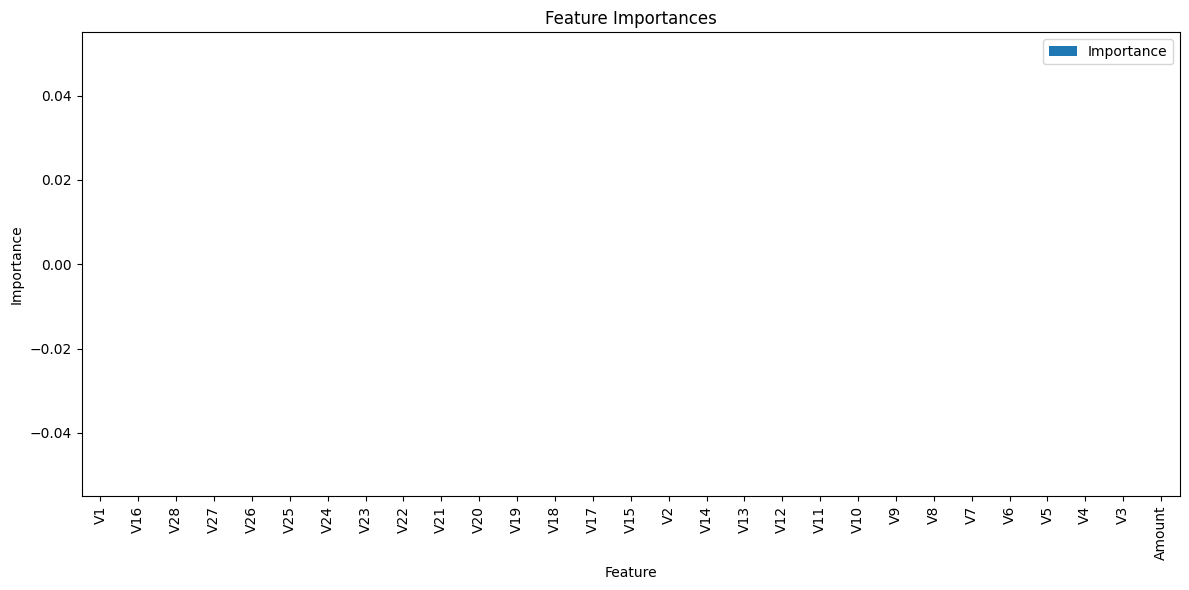

In [7]:
# Plotting feature importances
features_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [8]:
# Training the model
rf = RandomForestClassifier(n_estimators=100, random_state=142)
rf.fit(X, y)

KeyboardInterrupt: 

In [9]:
# Getting feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame and sort them
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

   Feature  Importance
0       V1         0.0
15     V16         0.0
27     V28         0.0
26     V27         0.0
25     V26         0.0
24     V25         0.0
23     V24         0.0
22     V23         0.0
21     V22         0.0
20     V21         0.0
19     V20         0.0
18     V19         0.0
17     V18         0.0
16     V17         0.0
14     V15         0.0
1       V2         0.0
13     V14         0.0
12     V13         0.0
11     V12         0.0
10     V11         0.0
9      V10         0.0
8       V9         0.0
7       V8         0.0
6       V7         0.0
5       V6         0.0
4       V5         0.0
3       V4         0.0
2       V3         0.0
28  Amount         0.0


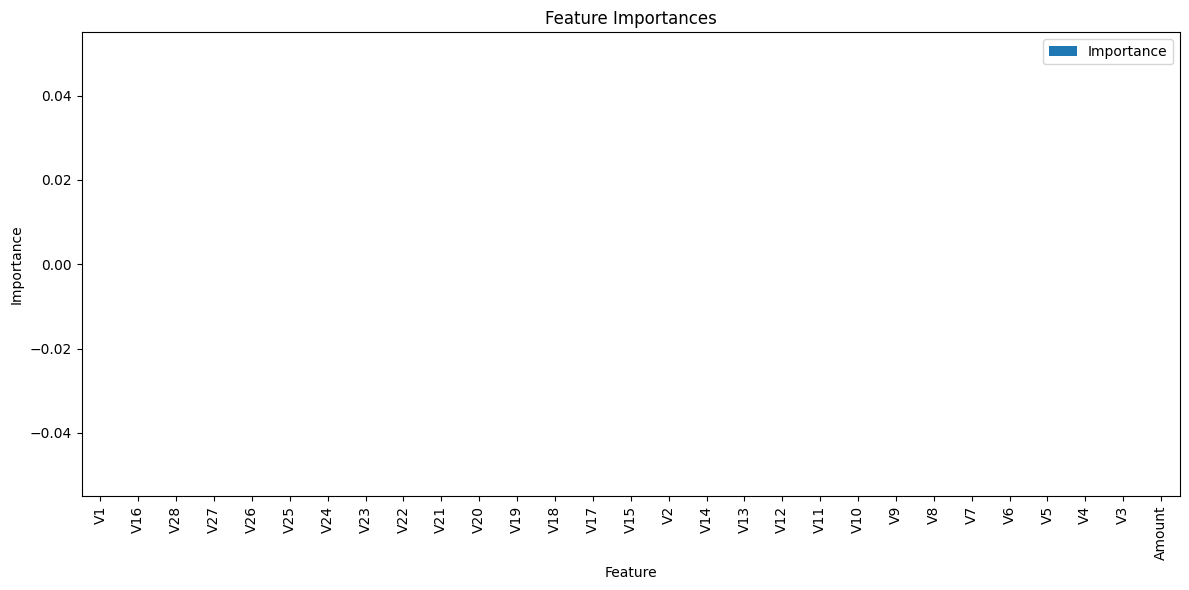

In [10]:
# Plotting feature importances
features_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
import pandas as pd

# Assuming 'data' is your DataFrame
X = df[['V10', 'V14', 'V12', 'V4', 'V17', 'V11', 'V3', 'V16', 'V7', 'V21']]
y = df['Class']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)



Accuracy: 0.999428450837979
Precision: 0.9989654386364832
Recall: 0.9998946925021062
ROC-AUC: 0.9999840602179509
F1 Score: 0.9994298495680014
Confusion Matrix:
[[56691    59]
 [    6 56970]]


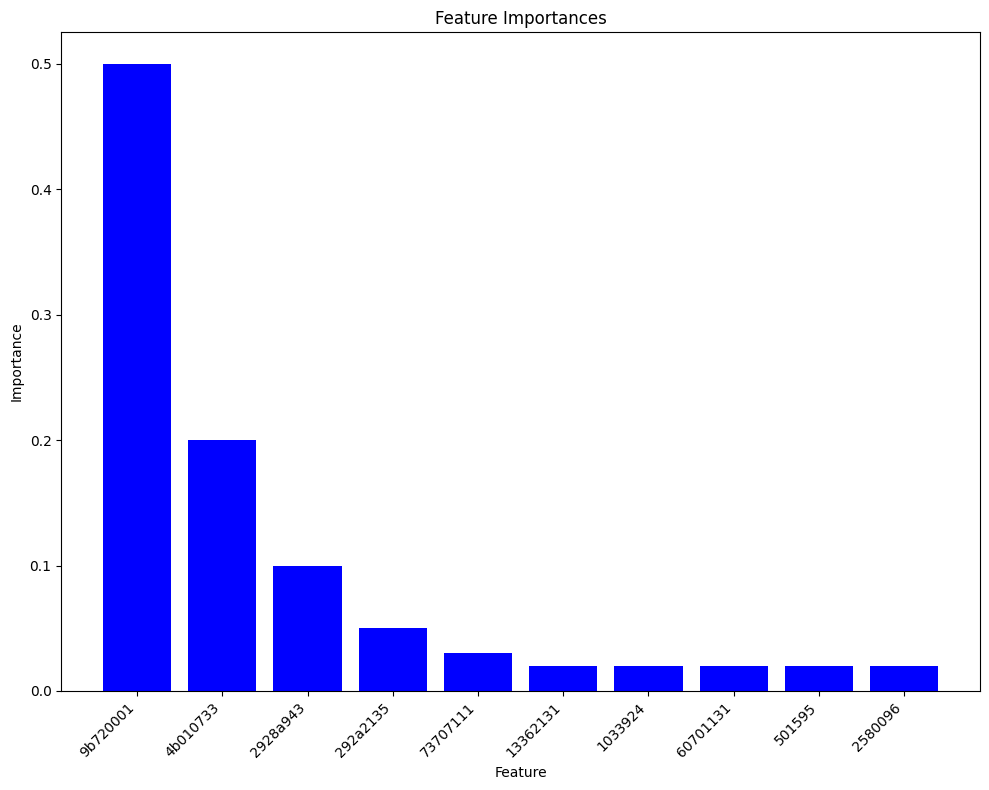

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example feature importances (usually you'd get these from a model like RandomForest)
importances = [0.5, 0.2, 0.1, 0.05, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02]
features = ['9b720001', '4b010733', '2928a943', '292a2135', '73707111', '2580096', '501595', '60701131', '1033924', '13362131']

# Sorting the features by their importance
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = [importances[i] for i in indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center', color='blue')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


In [16]:
# Getting feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame and sort them
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

   Feature  Importance
9      V10    0.163159
13     V14    0.162165
3       V4    0.133774
11     V12    0.117321
16     V17    0.089908
10     V11    0.058668
2       V3    0.045020
15     V16    0.036533
6       V7    0.029807
1       V2    0.020868
20     V21    0.015493
8       V9    0.014113
7       V8    0.010455
0       V1    0.010227
17     V18    0.010189
5       V6    0.008954
18     V19    0.008658
4       V5    0.008241
26     V27    0.007435
12     V13    0.006490
19     V20    0.006046
27     V28    0.005814
22     V23    0.005570
14     V15    0.005489
25     V26    0.005484
24     V25    0.005300
23     V24    0.004468
21     V22    0.004301
28  Amount    0.000049


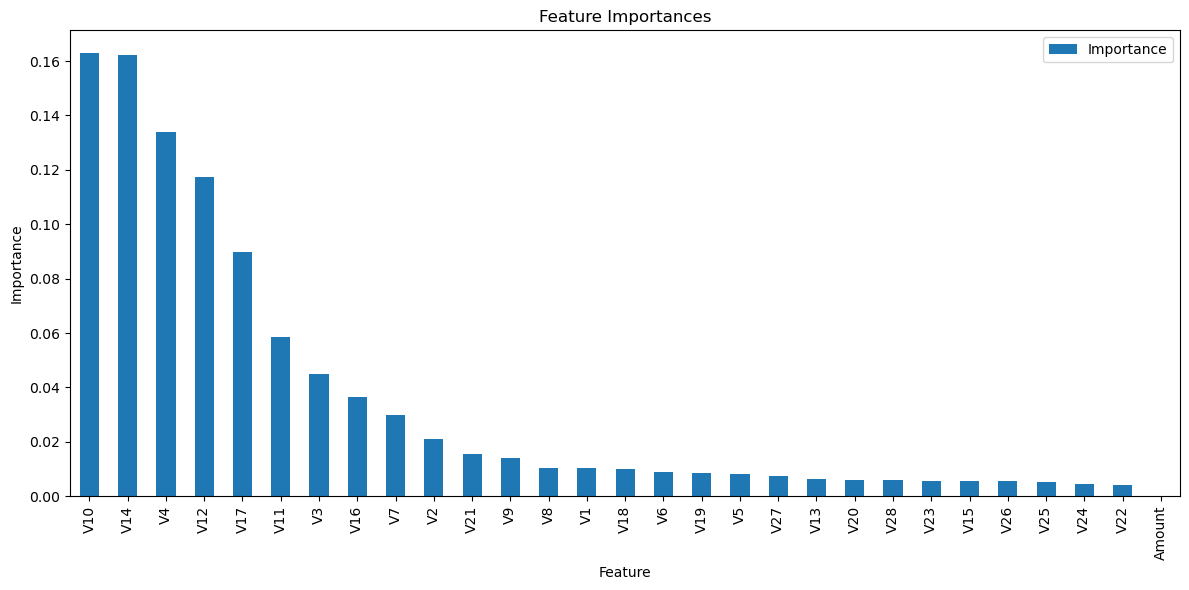

In [17]:
# Plotting feature importances
features_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

We used the entire dataset to train the model for the purpose of feature selection to detect features contributing the most to predicting the outcome. However, we should keep in mind that this method won't give us insights into the model's performance on unseen data since you're not holding out a test set for evaluation.

After selecting the most important features, we can proceed to use them in training ML models subsequently, potentially with different subsets of data or different modeling techniques to confirm their utility and robustness. This method also helps in reducing dimensionality before applying computationally intensive hyperparameter tuning algorithms.

In [21]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Applying PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

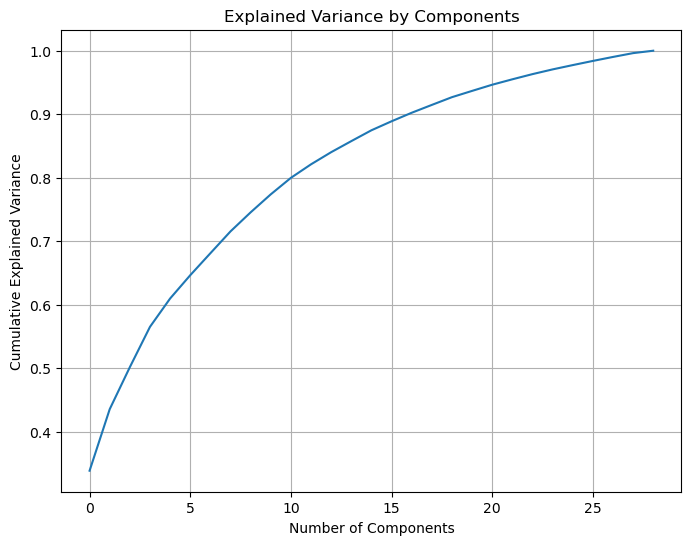

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

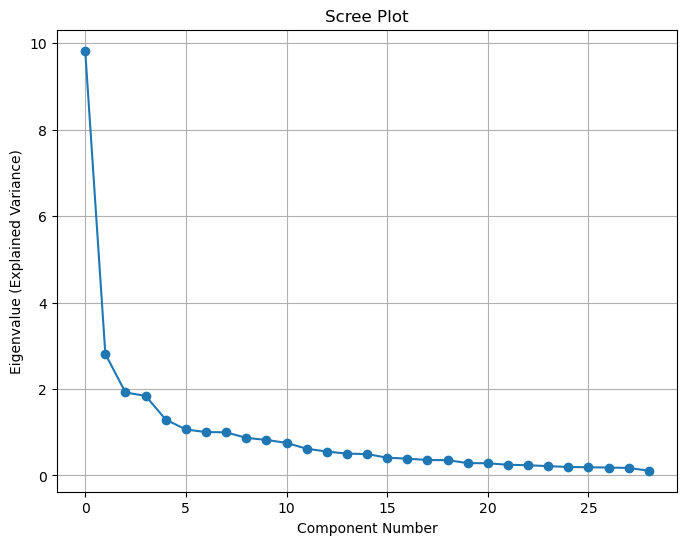

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()